In [1]:
from specim_test.specim.specfuncs import spec2d, spec1d

In [2]:
infile1 = '../galaxy_spectra/spec2d_r201121_0030-J0040+2555_LRISr_2020Nov21T045325.037.fits'
#infile2 = '../galaxy_spectra/spec2d_r201121_0031-J0040+2555_LRISr_2020Nov21T051705.971.fits'

In [3]:
spec1 = spec2d.Spec2d(infile1, hext=12, xtrim=[40, 170]) #  xtrim=[40, 500]


Loading file ../galaxy_spectra/spec2d_r201121_0030-J0040+2555_LRISr_2020Nov21T045325.037.fits
-----------------------------------------------
Read in 2-dimensional spectrum from ../galaxy_spectra/spec2d_r201121_0030-J0040+2555_LRISr_2020Nov21T045325.037.fits (HDU=12)
The input dataset was trimmed
 xrange: 40:171.  yrange: 0:4096
Final data dimensions (x y): 131 x 4096

Dispersion axis:              x
N_pixels along dispersion axis: 131



In [4]:
spec1.set_dispaxis('y')


Old value of dispaxis: x

Dispersion axis:              y
N_pixels along dispersion axis: 4096




### To subtract sky from original data here we are using pypeit generated sky model. Also using 'szap' function in spec2d.py cosmic ray rejection procedure is taken care of. Then this sky subtracted and cosmic ray rejected data are being used for 1d spectra extraction.


pypeit generated sky model will be used for sky subtraction


From this point sky subtracted data will be used
 Spectrum Start:     0.00
 Spectrum End:     4095.00
 Dispersion (1st pixel):   1.00
 Dispersion (average):      1.00


From now cosmic ray rejected data will be used


Cutout image center (x, y): (2048, 65)
Cutout image size (x y): 4096x131

Calculating display limits
--------------------------
 Clipped mean: 104.643723
 Clipped rms:  46.558998
 fmin (mean -   1 sigma):  58.084724
 fmax (mean +  10 sigma):  570.233704

Cutout image center (x, y): (2048, 65)
Cutout image size (x y): 4096x131

Calculating display limits
--------------------------
 Clipped mean: 3.303260
 Clipped rms:  15.851709
 fmin (mean -   1 sigma):  -12.548450
 fmax (mean +  10 sigma):  161.820353

Cutout image center (x, y): (2048, 65)
Cutout image size (x y): 4096x131

Calculating display limits
--------------------------
 Clipped mean: 3.302069
 Clipped rms:  15.729633
 fmin (mean -   1 sigma):  -12.42

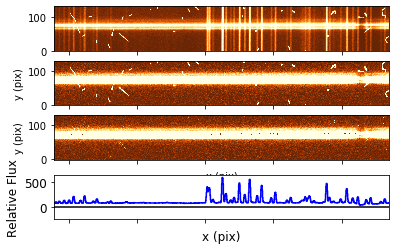

<Figure size 432x288 with 0 Axes>

In [5]:
spec1.display_spec(use_skymod=True, doszap=True)

Profile max value (before normalization) 567.611267


<IPython.core.display.Javascript object>


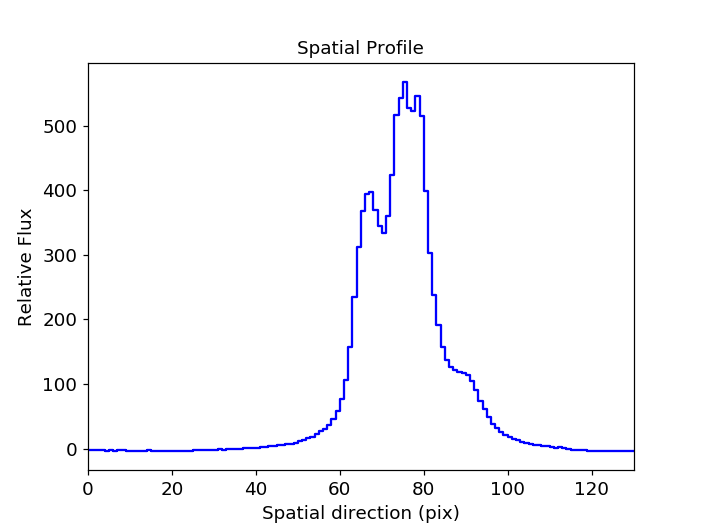

In [6]:
%matplotlib notebook
profile = spec1.spatial_profile(pixrange=[2200,3300])

In [ ]:
## These are the values we used as initial guess for profiles

# if two Gaussian and one Moffat
# co = 90
# gauss 1 (secondary peak) = 400, 65, 3
# gauss 2 (tertiary peak) = 150, 90, 3
# primary peak = 560, 75, 3, 4.765 (for Moffat profile) or 560, 75, 3 (if gaussian profile is used)

### Here we are going to use two Gaussian profile and one Moffat profile to fit the total profile.


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 2
Number of Moffat profile : 1

Now enter constants of the background polynomial upto degree 0
c0 : 90

Enter parameter values for a Gaussian profile in following format...
amplitude_value, mu_value, sigma_value

Parameters of Gaussian profile 1 : 400, 65, 3

amplitude=400.000000, mu=65.000000, sigma=3.000000

Parameters of Gaussian profile 2 : 150, 95, 3

amplitude=150.000000, mu=95.000000, sigma=3.000000

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 560, 75, 3, 4.765 

amplitude=560.000000, x_0=75.000000, gamma=3.000000, alpha=4.765000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3]
Componen

<IPython.core.display.Javascript object>


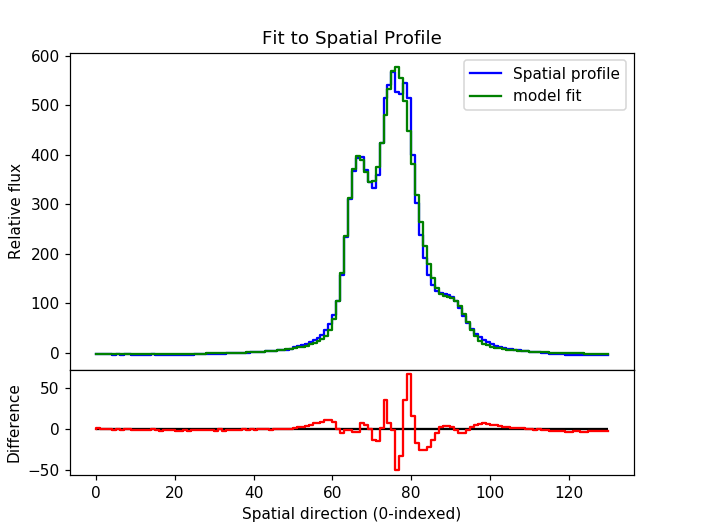

<IPython.core.display.Javascript object>


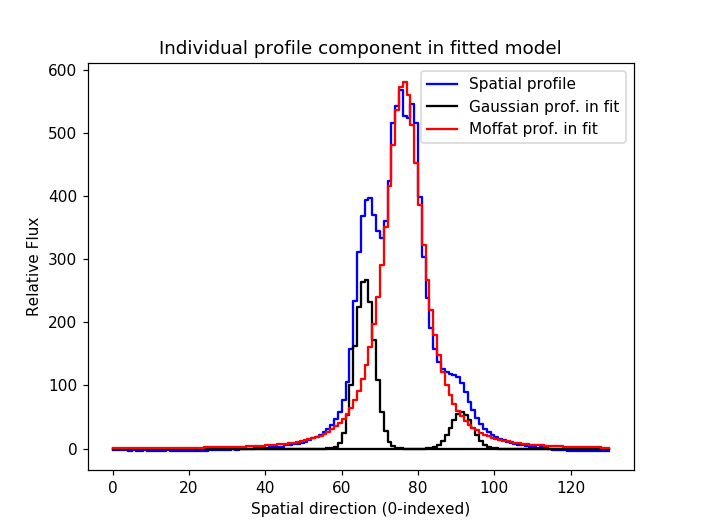


Do you want to start over ? : type yes/no
no


In [7]:
mod = spec1.initial_model()

### From the image taken by OSIRIS we found that the center to center distace between primary and secondary peak is 1.894" and the center to center distance between primary to tertiary peak is 1.442". For LRIS, using which we took our spectra, the dector pixel scale for both side (red and blue) is 0.135"/pixel. So for our spectra the  center to center distace between primary and secondary peak is (1.894"/0.135") or 14.03 pixel. And the center to center distance between primary to tertiary peak is (1.442"/0.135") or 10.68 pixel.

In [8]:
# impose constraints
def tie_gamma(model):
     
    return model.gamma_4
    
def tie_alpha(model):
     
    return model.alpha_4                   
                    
def tie_pos1_gauss(model):
    return model.mean_2 - 10.68

def tie_pos1_moffat(model):
     return model.x_0_3 - 10.68
            
def tie_pos2_gauss(model):
     return model.mean_2 + 14.03
    
def tie_pos2_moffat(model):
    return model.x_0_3 + 14.03

# for two Gaussian and one Moffat  
mod[1].mean.tied = tie_pos1_moffat 
mod[2].mean.tied = tie_pos2_moffat 

# for three Gaussian profile
#mod[1].mean.tied = tie_pos1_gauss 
#mod[3].mean.tied = tie_pos2_gauss 

#mod[3].x_0.tied = tie_pos
#mod[2].alpha.tied = tie_alpha
#mod[3].alpha.tied = tie_alpha


Initial model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3]
Components: 
    [0]: <Polynomial1D(0, c0=-3.2915199)>

    [1]: <Gaussian1D(amplitude=271.30486536, mean=66.5719394, stddev=2.53118362)>

    [2]: <Gaussian1D(amplitude=57.6544553, mean=91.98157836, stddev=2.81991111)>

    [3]: <Moffat1D(amplitude=581.38094649, x_0=76.7730013, gamma=7.50339258, alpha=1.48648547)>
Parameters:
            c0_0           amplitude_1     ...      gamma_3           alpha_3      
    ------------------- ------------------ ... ----------------- ------------------
    -3.2915198970472717 271.30486536161925 ... 7.503392583666553 1.4864854718960168

-------------------------------------------


Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3]
Components: 
    [0]: <Polynomial1D(0, c0=-1.09647397)>

    [1]: <Gaussian1D(amplitude=280.25917161, mean=6

<IPython.core.display.Javascript object>


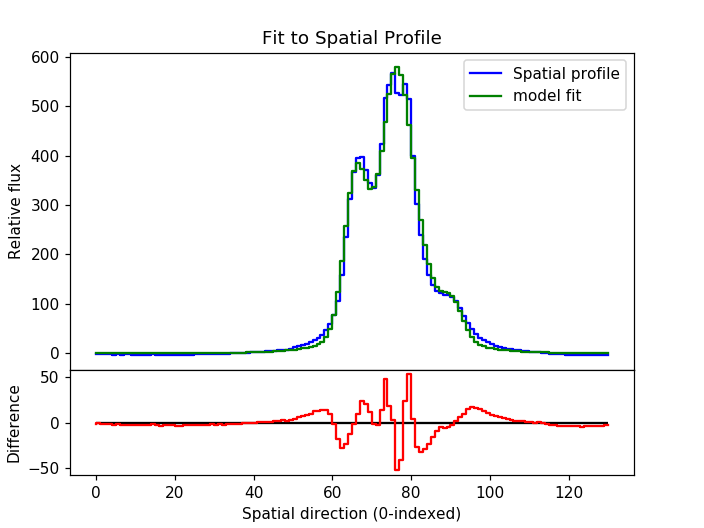

<IPython.core.display.Javascript object>


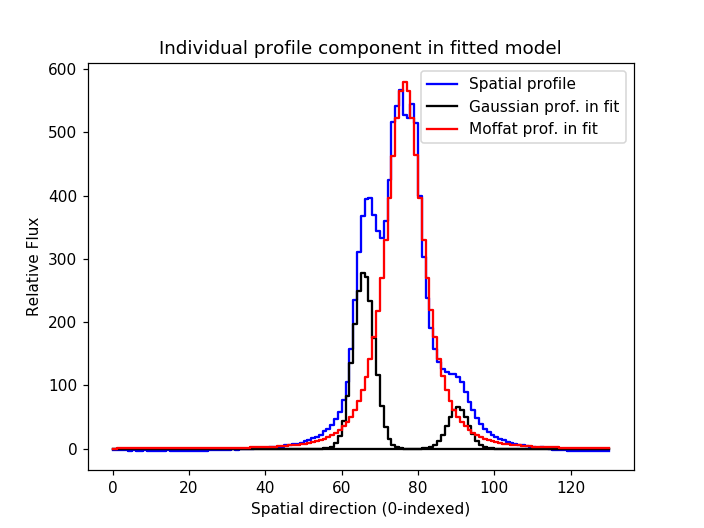

In [9]:
 mod_new = spec1.refined_model(mod)


Running fit_trace
---------------------------------------------------------
Fitting to the trace at 204 segments
  of the 2D spectrum with stepsize=20 pix ...
    Done
Fitting polynomial of degree 3 to parameter: mean_1
Fitting polynomial of degree 2 to parameter: stddev_1
Fitting polynomial of degree 3 to parameter: mean_2
Fitting polynomial of degree 2 to parameter: stddev_2
Fitting polynomial of degree 3 to parameter: x_0_3
Fitting polynomial of degree 3 to parameter: gamma_3
Fitting polynomial of degree 3 to parameter: alpha_3


<IPython.core.display.Javascript object>


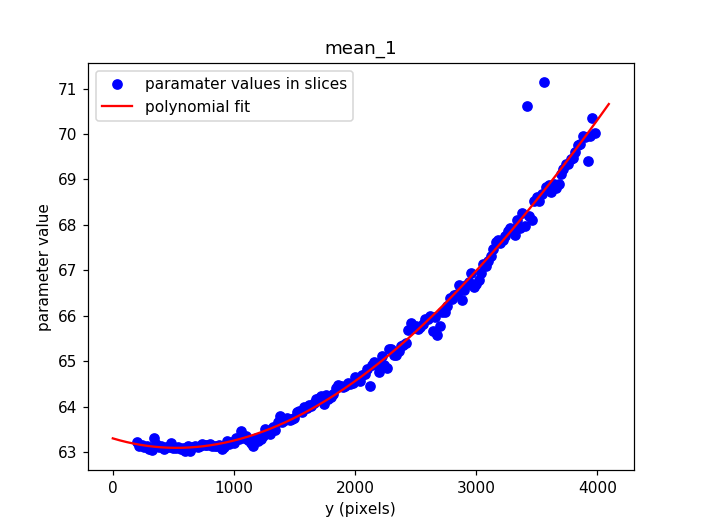

<IPython.core.display.Javascript object>


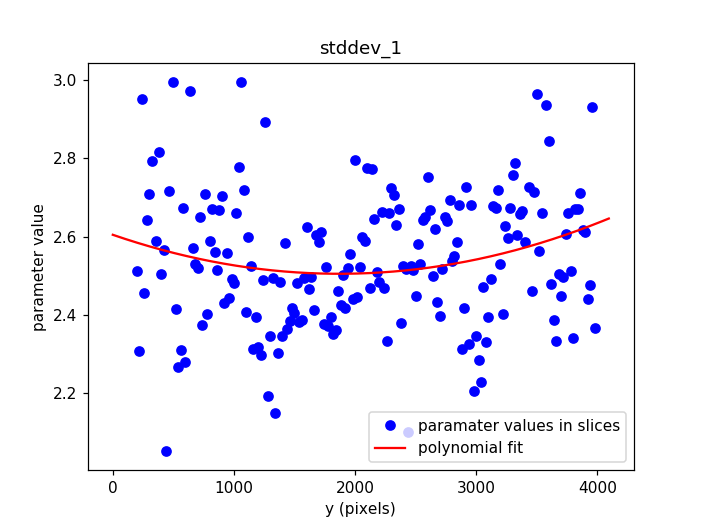

<IPython.core.display.Javascript object>


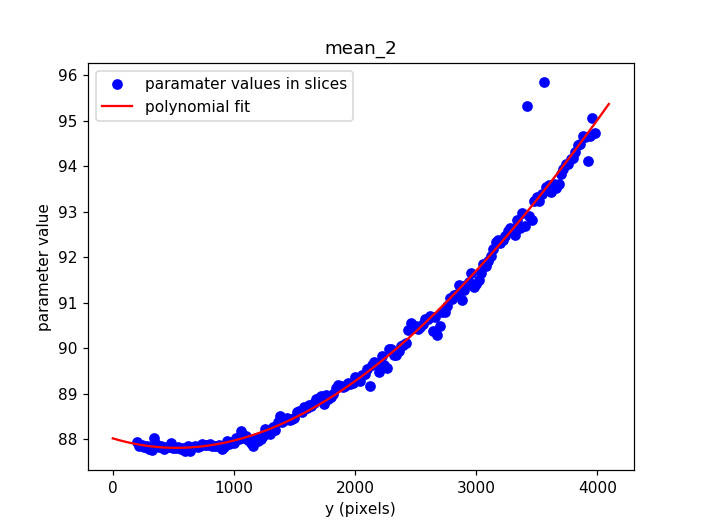

<IPython.core.display.Javascript object>


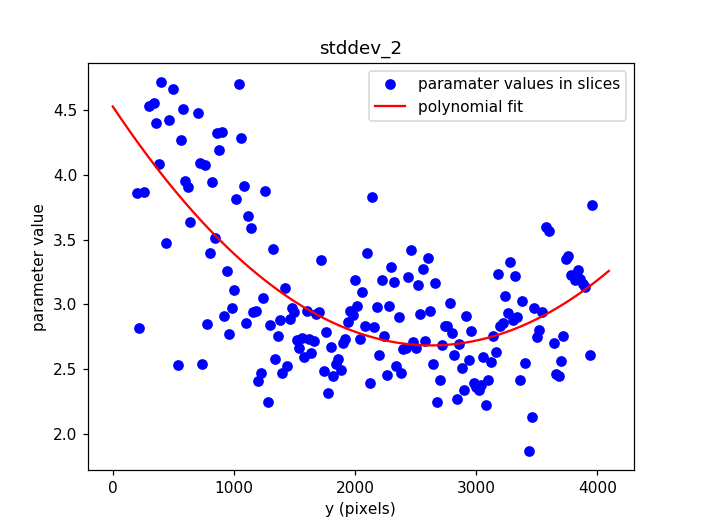

<IPython.core.display.Javascript object>


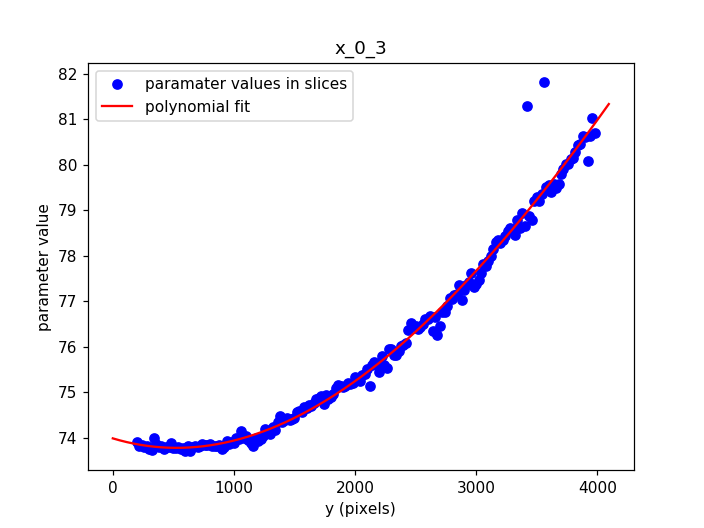

<IPython.core.display.Javascript object>


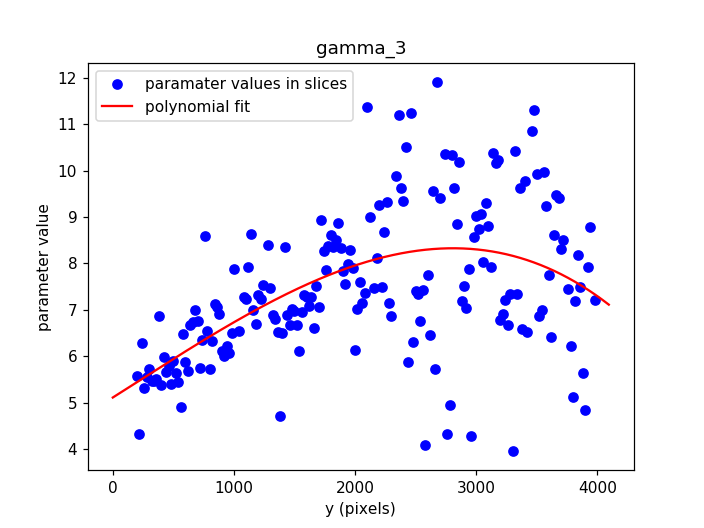

<IPython.core.display.Javascript object>


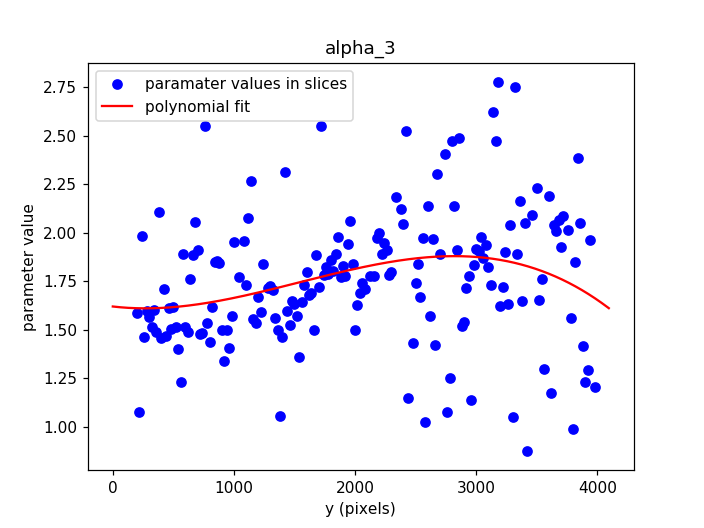

In [10]:
spec1.find_and_trace(mod_new, stepsize=20, fitorder={'stddev_1':2, 'stddev_2':2, 'stddev_3':2}, 
                    fitrange=[200,4000])  

Fitting to 3 components, plus a background
Extracting the spectrum.  Please be patient
 Extraction range (pixels): 0 - 4096
Fitting to the trace at 4096 segments
  of the 2D spectrum with stepsize=1 pix ...
 Spectrum Start:  5648.49
 Spectrum End:     8924.68
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80

 Spectrum Start:  5648.46
 Spectrum End:     8924.56
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80

 Spectrum Start:  5648.48
 Spectrum End:     8924.63
 Dispersion (1st pixel):   0.77
 Dispersion (average):      0.80


Plotting the spectrum


<IPython.core.display.Javascript object>


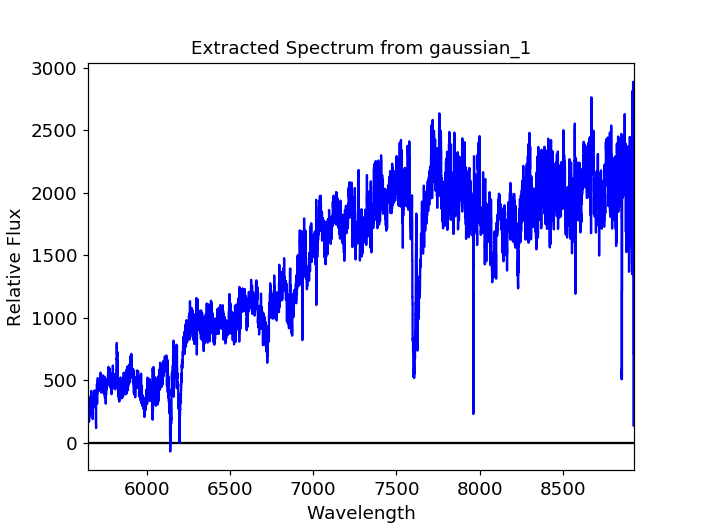

<IPython.core.display.Javascript object>


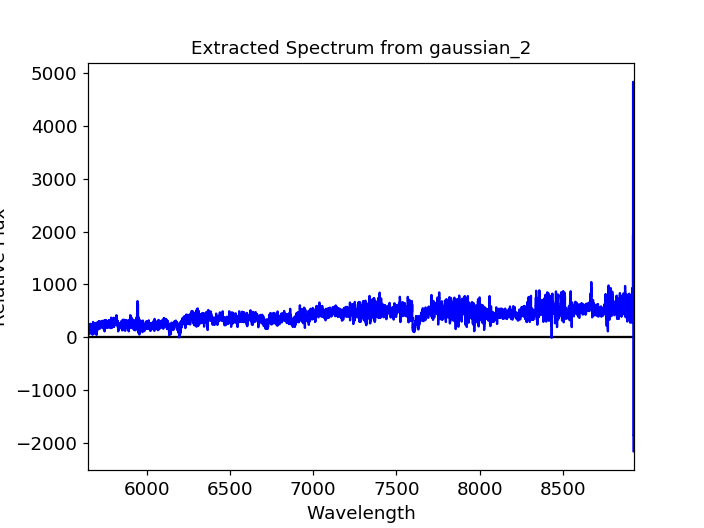

<IPython.core.display.Javascript object>


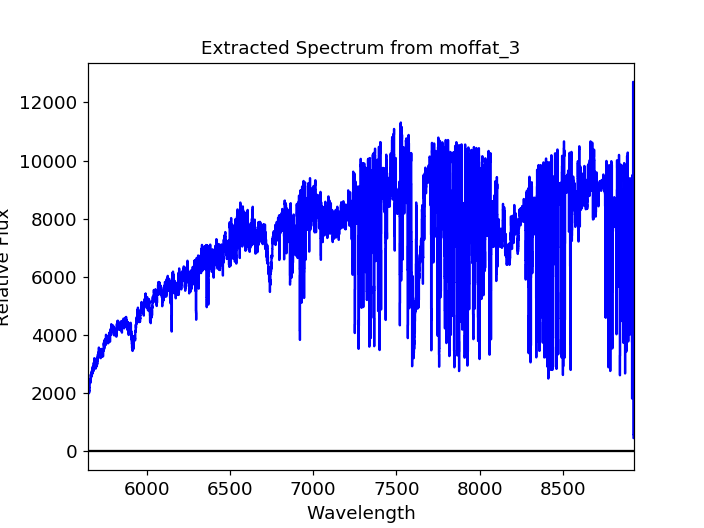

In [11]:
spec1.extract(method='modelfit', use_wavim=True)

### The following is the extracted and smoothed spectra for the secondary peak.

Extracted Spectrum from gaussian_1


<IPython.core.display.Javascript object>


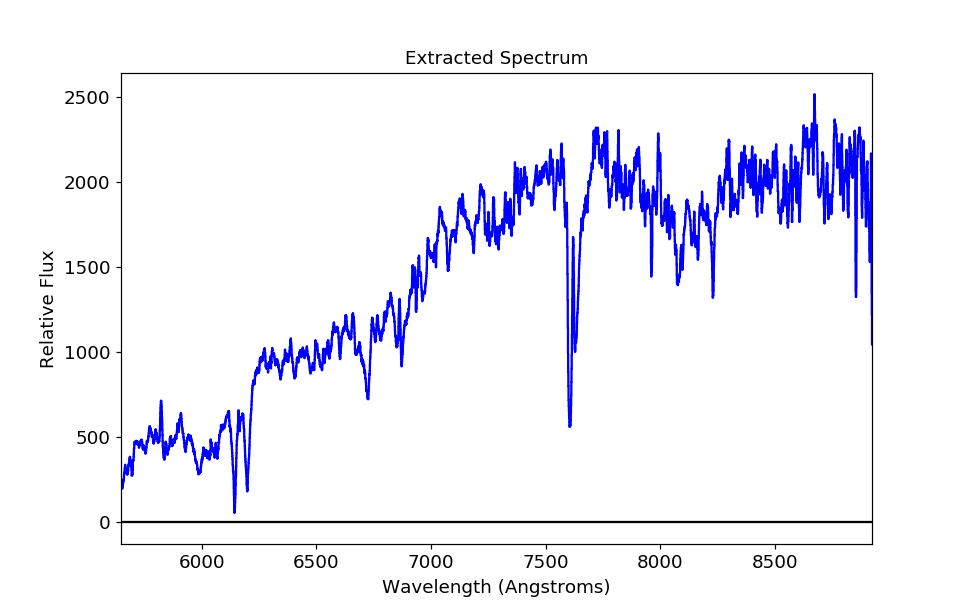

In [12]:
print(spec1.spectra[0][0])
spec1.spectra[0][1].smooth(7)

### In the above smoothed spectra Ca K+H lines are prominent with the around 4000A line break. The calculated redshift from these two lines is 0.562.

<IPython.core.display.Javascript object>


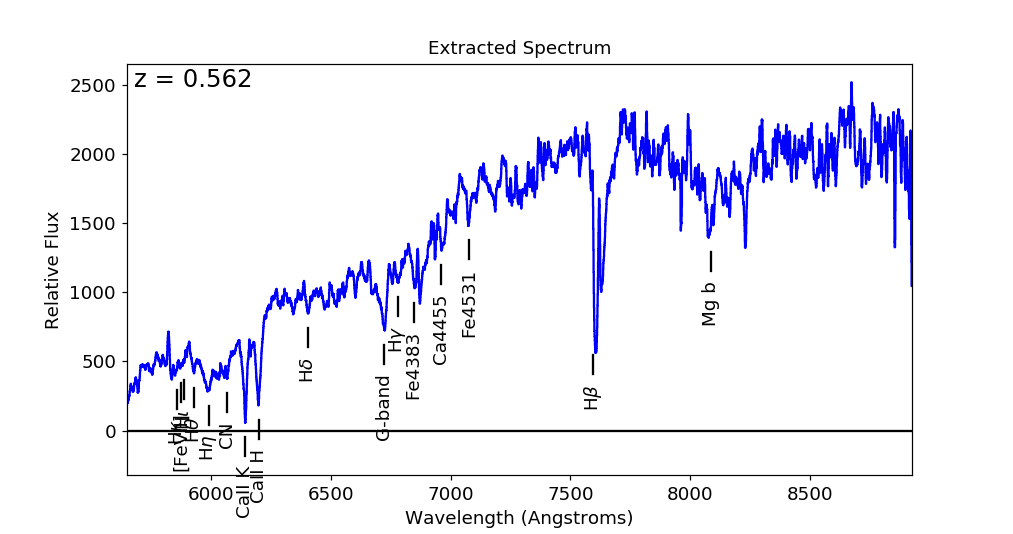


Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-kappa       3750.00       5857.50
[Fe VII]      3761.40       5875.31
H-iota        3770.00       5888.74
H-theta       3797.00       5930.91
H-eta         3835.00       5990.27
CN bandhd     3883.00       6065.25
CaII K        3933.67       6144.39
CaII H        3968.47       6198.75
H-delta       4101.00       6405.76
G-band        4305.00       6724.41
H-gamma       4340.00       6779.08
Fe4383        4383.00       6846.25
Ca4455        4455.00       6958.71
Fe4531        4531.00       7077.42
H-beta        4861.00       7592.88
Mg I (b)      5176.00       8084.91



In [13]:
spec1.spectra[0][1].smooth(7)
spec1.spectra[0][1].mark_lines('abs', z=0.562, usesmooth=True)

### The following extracted spectra is for tertiary peak which looks similar to spectra for secondary peak.

Extracted Spectrum from gaussian_2


<IPython.core.display.Javascript object>


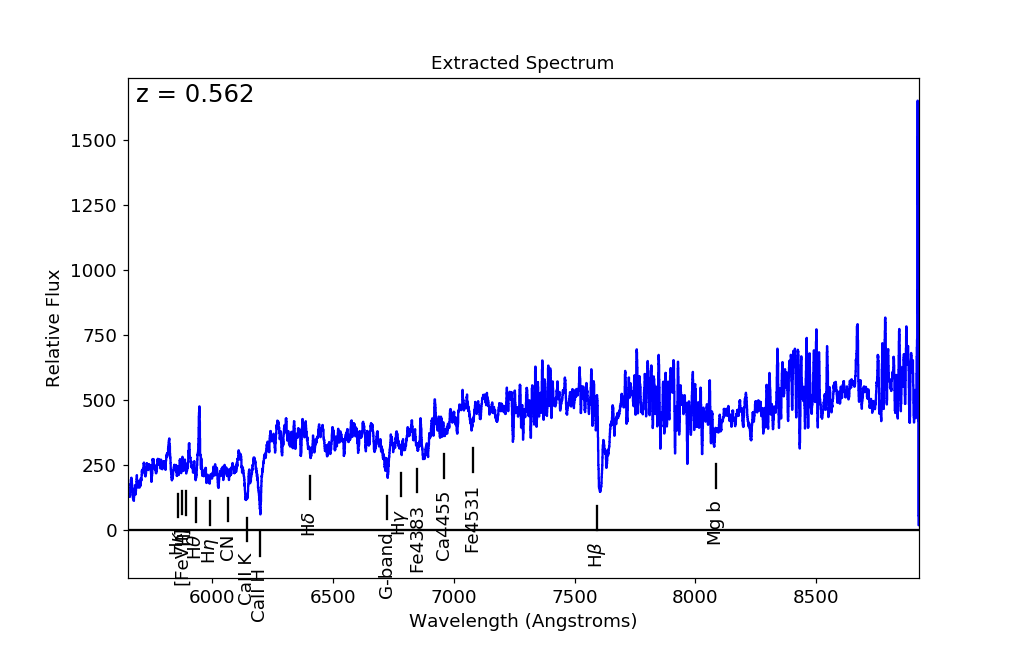


Line        lambda_rest  lambda_obs
----------  -----------  -----------
H-kappa       3750.00       5857.50
[Fe VII]      3761.40       5875.31
H-iota        3770.00       5888.74
H-theta       3797.00       5930.91
H-eta         3835.00       5990.27
CN bandhd     3883.00       6065.25
CaII K        3933.67       6144.39
CaII H        3968.47       6198.75
H-delta       4101.00       6405.76
G-band        4305.00       6724.41
H-gamma       4340.00       6779.08
Fe4383        4383.00       6846.25
Ca4455        4455.00       6958.71
Fe4531        4531.00       7077.42
H-beta        4861.00       7592.88
Mg I (b)      5176.00       8084.91



In [14]:
print(spec1.spectra[1][0])
spec1.spectra[1][1].smooth(7)
spec1.spectra[1][1].mark_lines('abs', z=0.562, usesmooth=True)